In [7]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install pandas

  Using cached pandas-2.0.1-cp38-cp38-win_amd64.whl (10.8 MB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached numpy-1.24.3-cp38-cp38-win_amd64.whl (14.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install matplotlib

  Using cached matplotlib-3.7.1-cp38-cp38-win_amd64.whl (7.6 MB)
  Using cached contourpy-1.0.7-cp38-cp38-win_amd64.whl (162 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.39.4-py3-none-any.whl (1.0 MB)
  Using cached kiwisolver-1.4.4-cp38-cp38-win_amd64.whl (55 kB)
  Using cached Pillow-9.5.0-cp38-cp38-win_amd64.whl (2.5 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
Note: you may need to restart the kernel to use updated packages.


In [56]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

In [3]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "Justdoit007",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection

# Q1

In [30]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT t.year, SUM(f.total_price) FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.time_dim t ON f.time_key = t.time_key GROUP BY t.year ORDER BY t.year ASC "
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

Connection to DB established!


[(2014, Decimal('14334731.25')),
 (2015, Decimal('15095720.25')),
 (2016, Decimal('14976508.25')),
 (2017, Decimal('15015806.00')),
 (2018, Decimal('15108197.25')),
 (2019, Decimal('14949510.25')),
 (2020, Decimal('15037190.25')),
 (2021, Decimal('883772.25'))]

In [31]:
df_q1 = pd.DataFrame(res,columns = ['year', 'total_sales'])
df_q1

,year,total_sales
0,2014,14334731.25
1,2015,15095720.25
2,2016,14976508.25
3,2017,15015806.00
4,2018,15108197.25
5,2019,14949510.25
6,2020,15037190.25
7,2021,883772.25


In [32]:
def changetype(x):
    x['total_sales'] = x['total_sales'].astype('float64')
changetype(df_q1)
df_q1.dtypes

year             int64
total_sales    float64
dtype: object

<Axes: xlabel='year'>

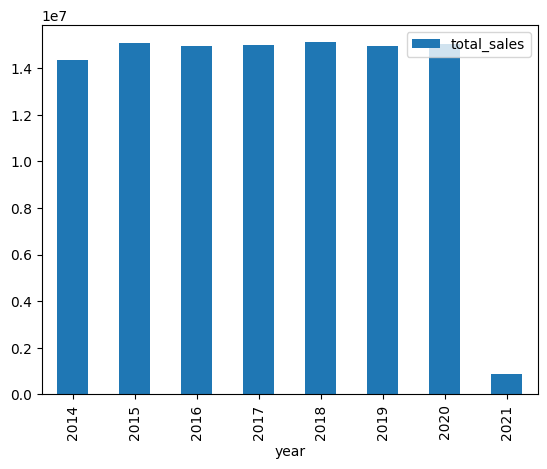

In [33]:
df_q1 = df_q1.set_index(['year'])
df_q1.plot.bar(y='total_sales')

Connection to DB established!


<Axes: ylabel='total_sales'>

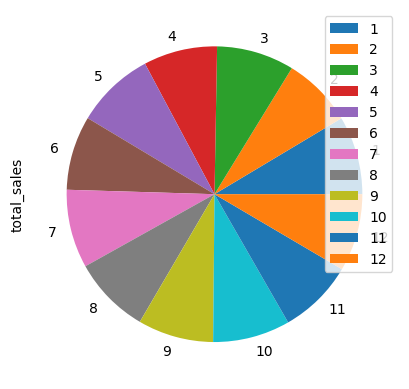

In [34]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT t.month, SUM(f.total_price)  FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.time_dim t ON f.time_key = t.time_key GROUP BY t.month ORDER BY t.month ASC "
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

df_q2 = pd.DataFrame(res,columns = ['month', 'total_sales'])
def changetype(x):
    x['total_sales'] = x['total_sales'].astype('float64')
changetype(df_q2)
df_q2.dtypes

df_q2 = df_q2.set_index(['month'])
df_q2.plot.pie(y='total_sales')

# Q2

In [40]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT c.nid, c.name, SUM(f.total_price)  FROM ecomdb_star_schema.fact_table f "\
" JOIN ecomdb_star_schema.customer_dim c ON f.customer_key = c.customer_key GROUP BY (c.nid, c.name) ORDER BY c.nid ASC "
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

df_q3 = pd.DataFrame(res,columns = ['nid', 'name', 'total_sales'])
df_q3
# def changetype(x):
#     x['total_sales'] = x['total_sales'].astype('float64')
# changetype(df_q3)

# df_q3 = df_q3.set_index(['nid'])
# df_q3.plot.bar(y='total_sales')

Connection to DB established!


,nid,name,total_sales
0,1000823546301,heena,11863.50
1,1002208705988,sandhya,12607.50
2,1003548365988,renuka parmar,13064.25
3,1003638926203,ankit,9462.75
4,1004673371219,anju kumari,9889.50
...,...,...,...
9186,9991940818631,dhanni devi,11243.50
9187,9994678097604,shivani,11643.25
9188,9995222543771,kavit goyar,10643.00
9189,9996724117485,shabbo devi,11978.75


In [41]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT b.bank_name, SUM(f.total_price)  FROM ecomdb_star_schema.fact_table f "\
" JOIN ecomdb_star_schema.trans_dim b ON f.payment_key = b.payment_key GROUP BY (b.bank_name) ORDER BY b.bank_name ASC "
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

df_q4 = pd.DataFrame(res,columns = ['bank_name', 'total_sales'])
df_q4

Connection to DB established!


,bank_name,total_sales
0,AB Bank Limited,2728515.50
1,Bangladesh Commerce Bank Limited,2730999.25
2,Bank Asia Limited,2687142.75
3,Bengal Commercial Bank Ltd,2704554.25
4,Bkash,2689352.50
5,BRAC Bank Limited,2705795.75
6,Citizens Bank Limited,2723215.25
7,City Bank Limited,2713952.50
8,Community Bank Bangladesh Limited,2685751.50
9,Dhaka Bank Limited,2728366.00


# Q3: Total sales in Barisal

In [43]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT SUM(f.total_price)  FROM ecomdb_star_schema.fact_table f "\
" JOIN ecomdb_star_schema.store_dim s ON f.store_key = s.store_key WHERE s.district = 'BARISAL' "
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

Connection to DB established!


[(Decimal('2897237.75'),)]

# Q4: Total sales in 2015

In [45]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT SUM(f.total_price)  FROM ecomdb_star_schema.fact_table f "\
" JOIN ecomdb_star_schema.time_dim t ON f.time_key = t.time_key WHERE t.year = '2015' "
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

Connection to DB established!


[(Decimal('15095720.25'),)]

# Q5: Total sales of Barisal in 2015

In [46]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT SUM(f.total_price)  FROM ecomdb_star_schema.fact_table f "\
" JOIN ecomdb_star_schema.store_dim s ON f.store_key = s.store_key "\
" JOIN ecomdb_star_schema.time_dim t ON f.time_key = t.time_key "\
" WHERE s.district = 'BARISAL' AND t.year = '2015' "
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

Connection to DB established!


[(Decimal('415748.75'),)]

# Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

In [85]:
con = PostgresConnection().getConnection()
select_stmt = " SELECT * FROM "\
" ( SELECT i.supplier, i.item_name, SUM(f.total_price) AS quantity_sales, "\
" RANK() OVER (PARTITION BY i.supplier ORDER BY SUM(f.total_price) DESC) AS rank "\
" FROM ecomdb_star_schema.fact_table f "\
" JOIN ecomdb_star_schema.item_dim i ON f.item_key = i.item_key "\
" GROUP BY (i.item_key, i.supplier) "\
" ORDER BY i.supplier ASC, quantity_sales DESC )"\
" AS ranked_sales WHERE rank <= 3"
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

df_q5 = pd.DataFrame(res,columns = ['supplier', 'item_name' , 'quantity_sales', 'rank'])
df_q5

Connection to DB established!


,supplier,item_name,quantity_sales,rank
0,BIGSO AB,K Cups – Starbuck's Pike Place,995456.0,1
1,BIGSO AB,Red Bull Sugar Free 8.4 oz,933720.0,2
2,BIGSO AB,Red Bull 8.4 oz,929240.0,3
3,Bolsius Boxmeer,Honey Packets,1012995.0,1
4,Bolsius Boxmeer,Monster Original Green 16 oz,920880.0,2
5,Bolsius Boxmeer,M&M Peanut Candy 1.7 oz,773360.0,3
6,"CHERRY GROUP CO.,LTD",Tejava Unsweetened Black Tea 16.9oz,656212.0,1
7,"CHERRY GROUP CO.,LTD",Topo Chico 20oz plastic,554592.0,2
8,"CHERRY GROUP CO.,LTD",Wonderful Pistachios (in shell),515988.0,3
9,CHROMADURLIN S.A.S,Monster Zero Ultra 16 oz,912160.0,1


# Q7: What products have been sold through card or mobile since X days?
### input: X = 5 days
### output: [item1, item2, item3, ...........]

In [39]:
x = int(input('input X:'))
con = PostgresConnection().getConnection()
select_stmt = " SELECT DISTINCT i.item_name"\
" FROM ecomdb_star_schema.fact_table f "\
" JOIN ecomdb_star_schema.trans_dim t ON f.payment_key = t.payment_key "\
" JOIN ecomdb_star_schema.item_dim i ON f.item_key = i.item_key "\
" JOIN ecomdb_star_schema.time_dim s ON f.time_key = s.time_key "\
" WHERE (t.trans_type = 'card' OR t.trans_type = 'mobile') "\
" AND s.t_date BETWEEN (CURRENT_DATE - INTERVAL '%s day') AND CURRENT_DATE "\
" GROUP BY (i.item_key) "
cur = con.cursor()
cur.execute(select_stmt, [x])
res = cur.fetchall()
cur.close()
res

df_q6 = pd.DataFrame(res,columns = ['item_name'])
df_q6

input X:1400
Connection to DB established!


,item_name
0,100% Juice Box Variety 6.75 oz
1,A&W Root Beer - 12 oz cans
2,A&W Root Beer Diet - 12 oz cans
3,Advil 2 pill packets
4,All Purpose Cleaner 409 Spray
...,...
254,Welch's 100% Juice Variety10 oz
255,Wint O Green LifeSavers Sugar Free
256,Wonderful Pistachios (in shell)
257,Yoplait Original Yogurt Variety Pack


# Q8: What season(quarter) is the worst for each product item? As example,
### item1-> q1
### item2-> q2

In [41]:
con = PostgresConnection().getConnection()
select_stmt = " SELECT * FROM "\
" ( SELECT i.item_name, s.quarter, "\
" RANK() OVER (PARTITION BY i.item_key ORDER BY SUM(f.quantity) DESC) AS rank "\
" FROM ecomdb_star_schema.fact_table f "\
" JOIN ecomdb_star_schema.item_dim i ON f.item_key = i.item_key "\
" JOIN ecomdb_star_schema.time_dim s ON f.time_key = s.time_key "\
" GROUP BY (i.item_key, s.quarter) "\
" ORDER BY i.item_name ASC )"\
" AS ranked_sales WHERE rank = 4"
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

df_q7 = pd.DataFrame(res,columns = ['item_name' , 'quarter', 'rank'])
df_q7

Connection to DB established!


,item_name,quarter,rank
0,100% Juice Box Variety 6.75 oz,Q1,4
1,A&W Root Beer - 12 oz cans,Q2,4
2,A&W Root Beer Diet - 12 oz cans,Q4,4
3,Advil 2 pill packets,Q1,4
4,All Purpose Cleaner 409 Spray,Q1,4
...,...,...,...
259,Welch's 100% Juice Variety10 oz,Q2,4
260,Wint O Green LifeSavers Sugar Free,Q1,4
261,Wonderful Pistachios (in shell),Q1,4
262,Yoplait Original Yogurt Variety Pack,Q1,4


# Q9: Break down the total sales of items geographically (division-wise).

 ###    item1-> division1->total_sales

 ###    item1-> division2->total_sales

In [43]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT i.item_name, s.division, SUM(f.total_price) "\
" FROM ecomdb_star_schema.fact_table f "\
" JOIN ecomdb_star_schema.item_dim i ON f.item_key = i.item_key "\
" JOIN ecomdb_star_schema.store_dim s ON f.store_key = s.store_key "\
" GROUP BY (i.item_key, s.division) "\
" ORDER BY i.item_name ASC , s.division ASC"
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

df_q7 = pd.DataFrame(res,columns = ['item_name' , 'division', 'total_sales'])
df_q7

Connection to DB established!


,item_name,division,total_sales
0,100% Juice Box Variety 6.75 oz,BARISAL,23790.0
1,100% Juice Box Variety 6.75 oz,CHITTAGONG,64950.0
2,100% Juice Box Variety 6.75 oz,DHAKA,141195.0
3,100% Juice Box Variety 6.75 oz,KHULNA,37755.0
4,100% Juice Box Variety 6.75 oz,RAJSHAHI,38730.0
...,...,...,...
1843,Zoo Animal Cookies/Crackers,DHAKA,118286.0
1844,Zoo Animal Cookies/Crackers,KHULNA,35434.0
1845,Zoo Animal Cookies/Crackers,RAJSHAHI,37100.0
1846,Zoo Animal Cookies/Crackers,RANGPUR,25186.0


# Q10: What are the average sales of products sales per store monthly?
####  s1->M1-> avg_sales
####  s1-> M2 -> avg_sales

In [63]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT item_name, AVG(monthly_total_sales) FROM("\
" SELECT i.item_name AS item_name, SUM(f.total_price) as monthly_total_sales"\
" FROM ecomdb_star_schema.fact_table f "\
" JOIN ecomdb_star_schema.item_dim i ON f.item_key = i.item_key "\
" JOIN ecomdb_star_schema.time_dim s ON f.time_key = s.time_key "\
" GROUP BY (i.item_name, s.month) "\
" ORDER BY i.item_name ASC)"\
" AS monthly_sales GROUP BY (item_name)"
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

df_q7 = pd.DataFrame(res,columns = ['item_name' , 'avg_sales'])
df_q7

Connection to DB established!


,item_name,avg_sales
0,100% Juice Box Variety 6.75 oz,29281.250000000000
1,A&W Root Beer - 12 oz cans,22638.708333333333
2,A&W Root Beer Diet - 12 oz cans,13039.875000000000
3,Advil 2 pill packets,26980.333333333333
4,All Purpose Cleaner 409 Spray,33531.000000000000
...,...,...
254,Welch's 100% Juice Variety10 oz,31815.500000000000
255,Wint O Green LifeSavers Sugar Free,30225.333333333333
256,Wonderful Pistachios (in shell),42999.000000000000
257,Yoplait Original Yogurt Variety Pack,22432.000000000000


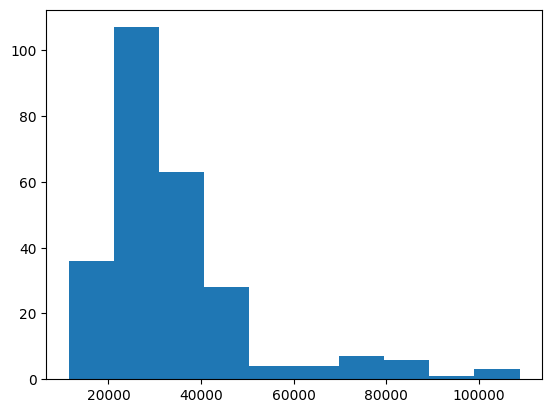

In [64]:
plt.scatter(df_q7['avg_sales'])
plt.show()